# Codes developed in the study of the book Pandas python: data wrangling for data science

## Chapter 1 - The Series data structure

### 1.1 How to create a Series

In [7]:
import pandas as pd

## Create notes Series
notes = pd.Series([9.5, 8.0, 6.5, 7.0])

# Create students Series
enrollements = ['M01', 'M02', 'M03', 'M04']
names = ['Ana', 'Bruno', 'Carlos', 'Diana']
students = pd.Series(names, index=enrollements)

print(notes)
print(students)

0    9.5
1    8.0
2    6.5
3    7.0
dtype: float64
M01       Ana
M02     Bruno
M03    Carlos
M04     Diana
dtype: object


**obs:** Note that to create the Grades Series, all you needed to do was create a list with the grades. If you don't specify an index, Pandas will automatically count from 0 to N-1.
For students, you needed to use the enrollment list as an index to refer to students using the index parameter in the Series constructor. 
There are other ways to create a Series. In the following snippet, a dictionary was used for this purpose. In this case, the dictionary keys are automatically transformed into labels.

In [8]:
dict_students = {'M01': 'Ana', 'M02': 'Bruno', 'M03': 'Carlos', 'M04': 'Diana'}
students_from_dict = pd.Series(dict_students)
print(students_from_dict)

M01       Ana
M02     Bruno
M03    Carlos
M04     Diana
dtype: object


### 1.2 Elementary properties of series

In addition to displaying the values ​​in the Series, the print command returned the *dtype*. The *dtype* is one of the basic properties of Series, corresponding to the type of the data array's elements. As you can see, the *dtpye* of notes is *float64*, which is used to store double-precision real numbers (64 bits). The *dtype* of students is *object*, used to store alphanumeric data (strings). The data array of a Series will always contain values ​​of the same type (with the same *dtype*).

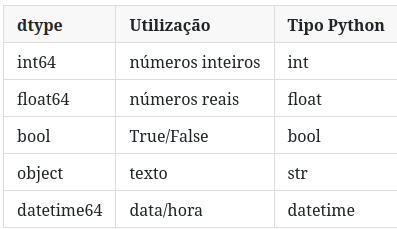

**dtype** is not the same as the Python object type *type*. The type of any Python object represents the class of that object and can always be obtained using the *type()* function.  
It’s also important to note that every Series is associated with other fundamental properties besides *dtype*. They are:

- *values:* data vector.  
- *index:* label vector.  
- *name:* name of the data vector.  
- *size:* size of the Series (number of elements).  
- *index.name:* name of the label vector.  
- *index.dtype:* *dtype* of the label vector.  




In [9]:
import pandas as pd

students = pd.Series({'M01': 'Ana', 'M02': 'Bruno', 'M03': 'Carlos', 'M04': 'Diana'})

students.name = 'Students of the course'
students.index.name = 'Enrollment'

#recover and print the properties of Series
print(students)
print("----------------")
size = students.size
dates = students.values
labels = students.index

students_type = type(students)
students_dtype = students.dtype
students_idx_dtype = students.index.dtype

print('number of elements:', size
      ,'\nvalues:', dates
      ,'\nlabels:', labels
      ,'\ntype of the object:', students_type
      ,'\ndata type of the elements:', students_dtype
      ,'\ndata type of the index:', students_idx_dtype)

Enrollment
M01       Ana
M02     Bruno
M03    Carlos
M04     Diana
Name: Students of the course, dtype: object
----------------
number of elements: 4 
values: ['Ana' 'Bruno' 'Carlos' 'Diana'] 
labels: Index(['M01', 'M02', 'M03', 'M04'], dtype='object', name='Enrollment') 
type of the object: <class 'pandas.core.series.Series'> 
data type of the elements: object 
data type of the index: object


### 1.3 Techniques for querying and modifying data

#### 1.3.1 Indexing

To index (access and retrieve) elements from a Series, square brackets `[]` are used, similar to lists and dictionaries in Python.  
Pandas allows three different indexing techniques:

- **Label-based indexing**  
- **Position-based indexing**  
- **Boolean indexing**

Label-based indexing uses the index labels to access the desired elements.  

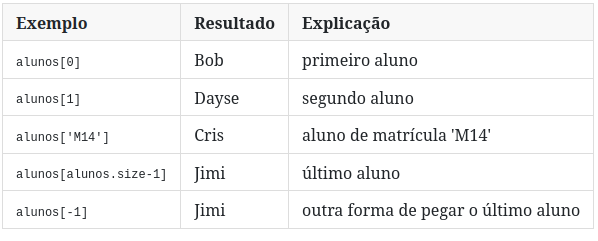

Position-based indexing, on the other hand, uses the integer position of the elements. This approach relies on the element’s position rather than its label.  
The key difference between label-based and position-based indexing in DataFrames lies in how slicing is handled:  
for position-based indexing, slicing follows pure Python conventions — the start boundary is **inclusive** and the end boundary is **exclusive**.  
For label-based indexing, the **end boundary is inclusive**.

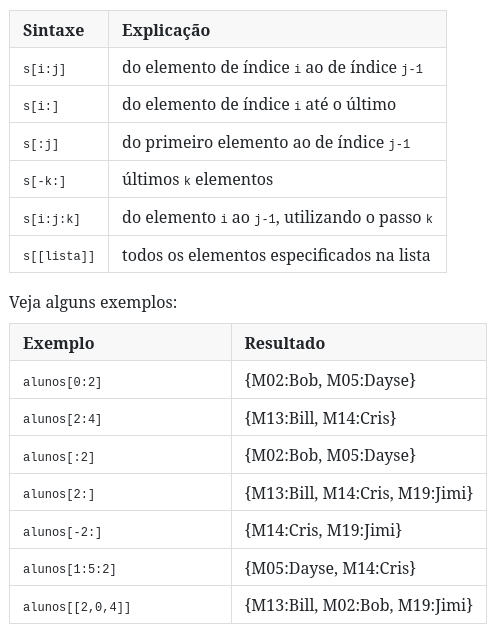

Finally, boolean indexing allows selecting a subset of a DataFrame based on a specific condition:

In [10]:
notes = pd.Series([9.5, 8.0, 6.5, 7.0])
students = pd.Series({'M01': 'Ana', 'M02': 'Bruno', 'M03': 'Carlos', 'M04': 'Diana'})

approved_students = notes[notes >= 7.0].index
print('Approved students:')
print('--------------------')
print(students[approved_students])

Approved students:
--------------------
M01      Ana
M02    Bruno
M04    Diana
dtype: object


/tmp/ipykernel_624977/3972741507.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(students[approved_students])


This approach works thanks to the command `approved_students = notes[notes >= 7.0].index`.  
It is responsible for generating an index vector (an object of type `pandas.core.indexes.numeric.Int64Index`) that stores the indices of all elements with values equal to or greater than 7.0 in the Series `notes`.  
We then use the returned vector to perform the slicing operation.

In [11]:
#### 1.3.2 Searching

In [12]:
students = pd.Series({'M01': 'Ana', 'M02': 'Bruno', 'M03': 'Carlos', 'M04': 'Diana'})

has_M03 = 'M03' in students
has_M05 = 'M05' in students

print('Is M03 in students?', has_M03
      ,'\nIs M05 in students?', has_M05)

# is part of pandas Series
has_Ana = students.isin(['Ana'])
print('Is Ana in students?\n', has_Ana)

Is M03 in students? True 
Is M05 in students? False
Is Ana in students?
 M01     True
M02    False
M03    False
M04    False
dtype: bool


#### 1.3.3 Modification

In [13]:
students = pd.Series({'M01': 'Ana', 'M02': 'Bruno', 'M03': 'Carlos', 'M04': 'Diana'})

print('Series original:')
print(students)


# Altering values
students['M02'] = 'Roberto'
students[['M04', 'M01']] = ['Fernanda', 'Clara']

# remove values
students = students.drop('M03')

print('----------------')
print('Series after modification:')
print(students)

Series original:
M01       Ana
M02     Bruno
M03    Carlos
M04     Diana
dtype: object
----------------
Series after modification:
M01       Clara
M02     Roberto
M04    Fernanda
dtype: object


### 2.4 Vectorized computing